# №1 (Вариант 18)


Вычислить х* на интервале [-5;5] при точности ε=0,01 
* методом половинного деления, 
* методом касательных и 
* методом простых итераций, 
* сравнить получившиеся значения; 
* построить график функции f(x). 
* Использовать решатели Python


$ у = x^3–0.107*x^2–10.890*x+0.336$


In [29]:
import matplotlib.pyplot as plt
import numpy as np

In [30]:
def func(x):
    return x**3 - 0.107*x**2-10.890*x+0.336

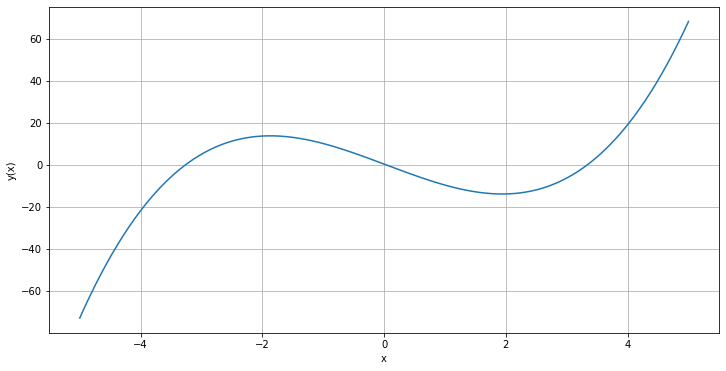

In [31]:
x = np.linspace(-5, 5, 1000)
y = func(x)
plt.figure(figsize = (12,6))
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid()
plt.show()

## Метод половинного деления

In [32]:
def bisect(f, a, b, eps = 0.01):
    while True:
        c = (a+b)/2
        if f(c)*f(a) < 0:
            b = c
        else:
            a = c
        if abs(f(c)) < eps:
            return c, f(c) 

In [33]:
bisect(func, -5, 5, 0.01)

(-3.262939453125, -0.009572684521904684)

## Метод касательных

Введем производную:

In [34]:
def f_der(x):
    return 3* x**2 - 2* 0.107*x - 10.890

In [35]:
def newton(f, f_der, x, eps = 0.01):
    while True: 
        x = x - f(x) / f_der(x)
        if abs(f(x)) < eps:
            return x, f(x)

In [36]:
newton(func, f_der, 0.1)

(0.030792912676677636, 0.0005929211262571399)

## Метод простых итераций

In [37]:
def fixiter(f, f_der, x, eps = 0.01):
    while True:
        l = 1/f_der(x)
        x = x - l* f(x)
        if abs(f(x)) < eps:
            return x, f(x)

In [38]:
fixiter(func, f_der, 0.)

(0.030853994490358125, -7.248863489234258e-05)

## Встроенные функции

In [39]:
from scipy.optimize import root

In [40]:
root(func, 3)['x']

array([3.33865187])

In [41]:
from scipy.optimize import fsolve

In [42]:
fsolve(func, [-5, 5])

array([-3.26249921,  3.33865187])

## выводы

Каждый способ определил верный корень с удовлетворительной погрешностью, но, в зависимости от выбора способа, определяются разные корни